In [1]:

import tensorflow as tf
# tf.config.experimental_run_functions_eagerly(True)
import tensorflow.keras as keras
import tensorflow.keras.datasets.mnist as input_data
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras import layers

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
mnist = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = mnist

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
# shape images
x_train[1].shape

(32, 32, 3)

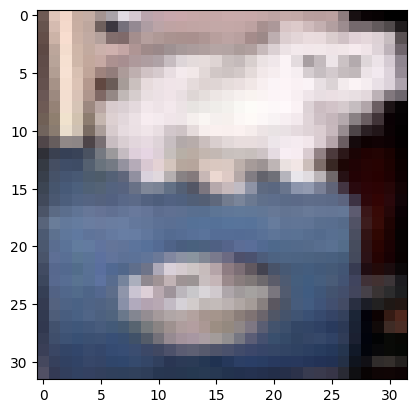

In [6]:
# show image
plt.imshow(x_train[38])


In [7]:
print(y_train[38])

[3]


## Train Test Split
#### train %85 data & test %15 data

In [8]:
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train , y_test))

X_train, X_test,y_train , y_test = train_test_split(X, y, test_size=15, random_state=42)


In [9]:
# data for predict
y_train_for_peredct = y_train
y_test_for_peredct = y_test
x_train_1_perd, x_validation_perd, y_train_1_perd, y_validation_perd = train_test_split(X, y, test_size=15)

print(X_train.shape)
print(X.shape)
print(y_train)

(59985, 32, 32, 3)
(60000, 32, 32, 3)
[[5]
 [7]
 [5]
 ...
 [8]
 [8]
 [4]]


In [10]:
X_train, X_test = X_train/255.0, X_test/255.0

print(X_test[5][1][1])

y_train = to_categorical(y_train, dtype ="uint8")
y_test = to_categorical(y_test, dtype ="uint8")

y_train[1]

x_train_1, x_validation, y_train_1, y_validation = train_test_split(X_train, y_train, test_size=15)

x_train_1[1].shape

[0.41568627 0.51372549 0.03921569]


(32, 32, 3)

## Create model

In [11]:
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32,3]))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 75)                7575      
                                                                 
 dense_4 (Dense)             (None, 10)                760       
                                                                 
Total params: 668185 (2.55 MB)
Trainable params: 668185 

In [12]:

model.layers

In [13]:

count_layer = 2
weight, bias = model.layers[count_layer].get_weights()
print(model.layers[count_layer])
print("weight", weight)
print("bias", bias)
print("len bias", len(bias))
print("len weight", len(weight))


weight [[-0.09834036 -0.05943937 -0.01942451 ...  0.05538246 -0.06708553
  -0.02691187]
 [ 0.00509261 -0.05048487  0.06365238 ...  0.09966281 -0.0359401
  -0.03314399]
 [-0.01289256 -0.01195189 -0.07371687 ...  0.03709576 -0.03053939
  -0.0607366 ]
 ...
 [ 0.02465238 -0.05194892  0.04506204 ...  0.01928781 -0.07134028
   0.03108774]
 [-0.01064851 -0.04768146  0.04372524 ... -0.03925287  0.03308858
  -0.02884101]
 [ 0.04170659  0.11506304 -0.08976952 ... -0.0474991  -0.01554392
   0.1033411 ]]
bias [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
len bias 150
len weight 200


In [14]:
# compile model

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])

In [15]:
# define callback

checkpoint_filepath = "model_cifar10_checkpoint_save.h5"

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, save_best_only=True)

model_checkpoint_earlyEstping = keras.callbacks.EarlyStopping(monitor='loss',patience=10)


In [16]:
# fit model

history = model.fit(x_train_1, y_train_1, batch_size=128, epochs=1000,
                   validation_data=[x_validation, y_validation], callbacks=[model_checkpoint_callback,model_checkpoint_earlyEstping])



Epoch 1/1000
469/469 [==============================] - 10s 19ms/step - loss: 2.0653 - accuracy: 0.2559 - val_loss: 2.0377 - val_accuracy: 0.2667
Epoch 2/1000
469/469 [==============================] - 10s 21ms/step - loss: 1.8512 - accuracy: 0.3415 - val_loss: 2.0061 - val_accuracy: 0.2667
Epoch 3/1000
469/469 [==============================] - 9s 18ms/step - loss: 1.7621 - accuracy: 0.3746 - val_loss: 1.8514 - val_accuracy: 0.4000
Epoch 4/1000
469/469 [==============================] - 9s 19ms/step - loss: 1.7014 - accuracy: 0.3980 - val_loss: 1.7341 - val_accuracy: 0.4000
Epoch 5/1000
469/469 [==============================] - 6s 12ms/step - loss: 1.6589 - accuracy: 0.4103 - val_loss: 1.8249 - val_accuracy: 0.4000
Epoch 6/1000
469/469 [==============================] - 8s 16ms/step - loss: 1.6200 - accuracy: 0.4275 - val_loss: 1.7653 - val_accuracy: 0.2667
Epoch 7/1000
469/469 [==============================] - 6s 12ms/step - loss: 1.5887 - accuracy: 0.4357 - val_loss: 1.7172 - val_

In [17]:
y_train_hat_probs = model.predict(x_train_1, verbose=0)
y_train_hat_classes = np.argmax(y_train_hat_probs, axis=1)


In [18]:
y_test_hat_probs = model.predict(X_test, verbose=0)
y_test_hat_classes = np.argmax(y_test_hat_probs,axis=1)


In [19]:
y_validation_hat_probs = model.predict(x_validation, verbose=0)
y_validation_hat_classes = np.argmax(y_validation_hat_probs, axis=1)


## evaluate model

In [20]:
y_train_for_peredct_=[]
for i in range(len(y_train_for_peredct)):
    y_train_for_peredct_.append(y_train_for_peredct[i][0])

y_test_for_peredct_ = []
for i in range(len(y_test_for_peredct)):
    y_test_for_peredct_.append(y_test_for_peredct[i][0])

y_validation_perd_ = []
for i in range(len(y_validation_perd)):
  y_validation_perd_.append(y_validation_perd[i][0])

In [25]:
# accuracy
accuracy_test = accuracy_score(y_test_for_peredct_, y_test_hat_classes)
accuracy_validation = accuracy_score(y_validation_perd_, y_validation_hat_classes)

print('Accuracy test : %f' % accuracy_test)
print('Accuracy validation : %f' % accuracy_validation)


Accuracy test : 0.400000
Accuracy validation : 0.266667


In [26]:
f1_test = f1_score(y_test_for_peredct_, y_test_hat_classes, average='micro')
f1_validation = f1_score(y_validation_perd_, y_validation_hat_classes, average='micro')

print('F1 score test : %f' % f1_test)
print('F1 score validation : %f' % f1_validation)


F1 score test : 0.400000
F1 score validation : 0.266667
